# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#  Trends in the Data
----

* With the random data their semss to be a positve correlation for the Southern Hempishere Max temp vs Latitude.

* With the random data their semss to be a small correlation for the Humidity vs Latitude.

* With the random data their semss to be no correlation for Wind Speed and Cloudiness.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random 
from random import sample 
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
sample_cities=random.sample(cities,600)

#how to print a zip
#for lats, lngs in zip(lats, lngs):
# print(f'lat ={lats} and long={lngs}')

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:

names_list=[]
for name in sample_cities:
    names_list.append(f"{name}")
names_list[0:15]

['yellowknife',
 'itarema',
 'odienne',
 'leshukonskoye',
 'cayenne',
 'laguna',
 'rudnyy',
 'nouakchott',
 'leningradskiy',
 'lavrentiya',
 'labrea',
 'rondonopolis',
 'lisakovsk',
 'vestmanna',
 'coquimbo']

In [25]:
#url for open weather map and find the data in US meterics 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#lists to add found data from api lookup
city_id=[]
city_name=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]
counter=0

#query url search for each city 
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Start the call counter 
record = 1
# Build query URLweather_api_key
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#create loop to look find weather data through an api lookup 
for city in names_list:
    response = requests.get(query_url+city).json()
    try:
        #append the lists with the repsonse from the api lookup
        city_name.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        #Include a print log of each city as it'sbeing processed (with the city number and city name).
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(.01)
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?&q=yellowknife
Processing Record 2 | Itarema
http://api.openweathermap.org/data/2.5/weather?&q=itarema
Processing Record 3 | Odienné
http://api.openweathermap.org/data/2.5/weather?&q=odienne
Processing Record 4 | Leshukonskoye
http://api.openweathermap.org/data/2.5/weather?&q=leshukonskoye
Processing Record 5 | Cayenne
http://api.openweathermap.org/data/2.5/weather?&q=cayenne
Processing Record 6 | Laguna
http://api.openweathermap.org/data/2.5/weather?&q=laguna
Processing Record 7 | Rudnyy
http://api.openweathermap.org/data/2.5/weather?&q=rudnyy
Processing Record 8 | Nouakchott
http://api.openweathermap.org/data/2.5/weather?&q=nouakchott
Processing Record 9 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?&q=leningradskiy
Processing Record 10 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?&q=lavrentiya
Processing Record 11 |

Processing Record 89 | Tura
http://api.openweathermap.org/data/2.5/weather?&q=tura
Processing Record 90 | Mahon
http://api.openweathermap.org/data/2.5/weather?&q=mao
Processing Record 91 | Vanimo
http://api.openweathermap.org/data/2.5/weather?&q=vanimo
Processing Record 92 | Faya
http://api.openweathermap.org/data/2.5/weather?&q=faya
Processing Record 93 | Cape Canaveral
http://api.openweathermap.org/data/2.5/weather?&q=cape canaveral
Processing Record 94 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?&q=bandarbeyla
Processing Record 95 | Umeå
http://api.openweathermap.org/data/2.5/weather?&q=umea
Processing Record 96 | Limbang
http://api.openweathermap.org/data/2.5/weather?&q=limbang
Processing Record 97 | Tazovsky
http://api.openweathermap.org/data/2.5/weather?&q=tazovskiy
Processing Record 98 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?&q=puerto ayora
Processing Record 99 | Tual
http://api.openweathermap.org/data/2.5/weather?&q=tual
Processing Record 

Processing Record 175 | Ancud
http://api.openweathermap.org/data/2.5/weather?&q=ancud
Processing Record 176 | Brainerd
http://api.openweathermap.org/data/2.5/weather?&q=brainerd
Processing Record 177 | Kaputa
http://api.openweathermap.org/data/2.5/weather?&q=kaputa
Processing Record 178 | Hammerfest
http://api.openweathermap.org/data/2.5/weather?&q=hammerfest
Processing Record 179 | Aklavik
http://api.openweathermap.org/data/2.5/weather?&q=aklavik
Processing Record 180 | Changtu
http://api.openweathermap.org/data/2.5/weather?&q=changtu
Processing Record 181 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?&q=petropavlovsk-kamchatskiy
Processing Record 182 | Voyvozh
http://api.openweathermap.org/data/2.5/weather?&q=voyvozh
Processing Record 183 | Labuhan
http://api.openweathermap.org/data/2.5/weather?&q=labuhan
Processing Record 184 | Bengkulu
http://api.openweathermap.org/data/2.5/weather?&q=bengkulu
Processing Record 185 | Plettenberg Bay
http://api.openweath

City not found. Skipping...
Processing Record 265 | Iracoubo
http://api.openweathermap.org/data/2.5/weather?&q=iracoubo
Processing Record 266 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?&q=port lincoln
Processing Record 267 | Kushmurun
http://api.openweathermap.org/data/2.5/weather?&q=kushmurun
Processing Record 268 | Acajutla
http://api.openweathermap.org/data/2.5/weather?&q=acajutla
Processing Record 269 | Labytnangi
http://api.openweathermap.org/data/2.5/weather?&q=labytnangi
Processing Record 270 | Sanguéya
http://api.openweathermap.org/data/2.5/weather?&q=sangueya
Processing Record 271 | Ferrol
http://api.openweathermap.org/data/2.5/weather?&q=ferrol
Processing Record 272 | Champerico
http://api.openweathermap.org/data/2.5/weather?&q=champerico
Processing Record 273 | La Serena
http://api.openweathermap.org/data/2.5/weather?&q=la serena
Processing Record 274 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?&q=makakilo city
Processing Record 275 | Po

Processing Record 354 | La Ronge
http://api.openweathermap.org/data/2.5/weather?&q=la ronge
Processing Record 355 | Reitoca
http://api.openweathermap.org/data/2.5/weather?&q=reitoca
Processing Record 356 | Mana
http://api.openweathermap.org/data/2.5/weather?&q=mana
Processing Record 357 | Soria
http://api.openweathermap.org/data/2.5/weather?&q=soria
Processing Record 358 | St. George's
http://api.openweathermap.org/data/2.5/weather?&q=saint-georges
Processing Record 359 | Río Gallegos
http://api.openweathermap.org/data/2.5/weather?&q=rio gallegos
Processing Record 360 | Surgut
http://api.openweathermap.org/data/2.5/weather?&q=surgut
Processing Record 361 | Dom Pedrito
http://api.openweathermap.org/data/2.5/weather?&q=dom pedrito
City not found. Skipping...
Processing Record 362 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?&q=port hedland
Processing Record 363 | Haapiti
http://api.openweathermap.org/data/2.5/weather?&q=haapiti
Processing Record 364 | Kamenka
http://api.

Processing Record 445 | Vila
http://api.openweathermap.org/data/2.5/weather?&q=vila
Processing Record 446 | Druzhba
http://api.openweathermap.org/data/2.5/weather?&q=druzhba
Processing Record 447 | Hirson
http://api.openweathermap.org/data/2.5/weather?&q=hirson
Processing Record 448 | Asău
http://api.openweathermap.org/data/2.5/weather?&q=asau
City not found. Skipping...
Processing Record 449 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?&q=new norfolk
Processing Record 450 | Bay Roberts
http://api.openweathermap.org/data/2.5/weather?&q=bay roberts
Processing Record 451 | Bud
http://api.openweathermap.org/data/2.5/weather?&q=bud
Processing Record 452 | Buin
http://api.openweathermap.org/data/2.5/weather?&q=buin
Processing Record 453 | Nieves
http://api.openweathermap.org/data/2.5/weather?&q=nieves
Processing Record 454 | Bouaké
http://api.openweathermap.org/data/2.5/weather?&q=bouake
Processing Record 455 | Katsuura
http://api.openweathermap.org/data/2.5/weather?&q=katsu

Processing Record 533 | Nova Olímpia
http://api.openweathermap.org/data/2.5/weather?&q=nova olimpia
Processing Record 534 | Zunyi
http://api.openweathermap.org/data/2.5/weather?&q=zunyi
Processing Record 535 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?&q=longyearbyen
Processing Record 536 | Terrace
http://api.openweathermap.org/data/2.5/weather?&q=terrace
Processing Record 537 | São Filipe
http://api.openweathermap.org/data/2.5/weather?&q=sao filipe
Processing Record 538 | Kuningan
http://api.openweathermap.org/data/2.5/weather?&q=kuningan
Processing Record 539 | Maningrida
http://api.openweathermap.org/data/2.5/weather?&q=maningrida
Processing Record 540 | Shawinigan
http://api.openweathermap.org/data/2.5/weather?&q=shawinigan
Processing Record 541 | Dosso
http://api.openweathermap.org/data/2.5/weather?&q=dosso
Processing Record 542 | Vardø
http://api.openweathermap.org/data/2.5/weather?&q=vardo
Processing Record 543 | Brae
http://api.openweathermap.org/data/2.5/weat

In [5]:
#create a dictionary to store found weather data
weather_dict = {
    "City": city_name,
    "Cloudiness": Cloudiness,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Temp,
    "Wind Speed":Wind_Speed
}

#create dataframe to store weather data
weather_data = pd.DataFrame(weather_dict)
weather_data.rename_axis('City_ID',inplace=True)
weather_data=weather_data.iloc[0:500]
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Yellowknife,20,CA,1584300276,63,62.46,-114.35,26.60,18.34
1,Itarema,57,BR,1584300010,81,-2.92,-39.92,83.64,6.38
2,Odienné,97,CI,1584300276,18,9.51,-7.57,93.72,3.00
3,Leshukonskoye,74,RU,1584300276,84,64.90,45.76,19.56,11.21
4,Cayenne,75,GF,1584300276,62,4.93,-52.33,86.00,11.41
...,...,...,...,...,...,...,...,...,...
495,Kindersley,90,CA,1584300316,72,51.47,-109.17,10.40,9.17
496,Zhiryatino,77,RU,1584300316,51,53.22,33.73,28.92,12.84
497,Albany,1,US,1584300316,22,42.60,-73.97,46.99,9.17


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Export the city data into a .csv.
weather_data.to_csv('../output_data/hwfile1.csv',header=True, index=True)

#Display the DataFrame
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Yellowknife,20,CA,1584300276,63,62.46,-114.35,26.60,18.34
1,Itarema,57,BR,1584300010,81,-2.92,-39.92,83.64,6.38
2,Odienné,97,CI,1584300276,18,9.51,-7.57,93.72,3.00
3,Leshukonskoye,74,RU,1584300276,84,64.90,45.76,19.56,11.21
4,Cayenne,75,GF,1584300276,62,4.93,-52.33,86.00,11.41
...,...,...,...,...,...,...,...,...,...
495,Kindersley,90,CA,1584300316,72,51.47,-109.17,10.40,9.17
496,Zhiryatino,77,RU,1584300316,51,53.22,33.73,28.92,12.84
497,Albany,1,US,1584300316,22,42.60,-73.97,46.99,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

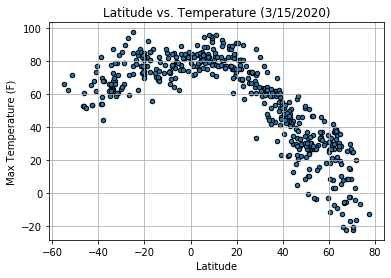

In [26]:
#Latitude vs. Temperature Plot
weather_data.plot(["Lat"],["Max Temp"],kind="scatter", edgecolors="black")
plt.title("Latitude vs. Temperature (3/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

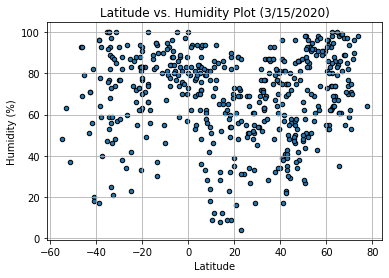

In [29]:
#Latitude vs. Humidity Plot
weather_data.plot(["Lat"],["Humidity"],kind="scatter",edgecolors="black")
plt.title("Latitude vs. Humidity Plot (3/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

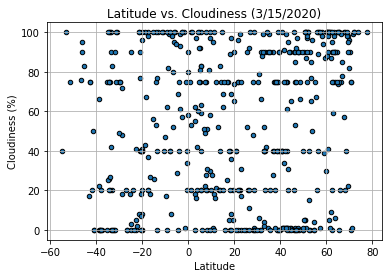

In [28]:
weather_data.plot(["Lat"],["Cloudiness"],kind="scatter",edgecolors="black")
plt.title("Latitude vs. Cloudiness (3/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

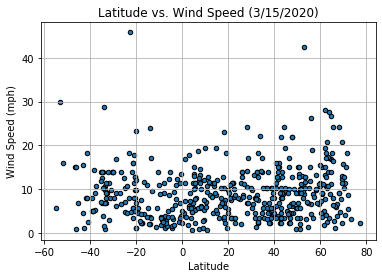

In [30]:
weather_data.plot(["Lat"],["Wind Speed"],kind="scatter",edgecolors="black")
plt.title("Latitude vs. Wind Speed (3/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [12]:
# Create Northern Hemisphere DataFrames
Northern_Hemisphere=weather_data.loc[weather_data["Lat"]>0,:]
Northern_Hemisphere.reset_index(drop=True,inplace=True)
Northern_Hemisphere.rename_axis('City_ID',inplace=True)
Northern_Hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Yellowknife,20,CA,1584300276,63,62.46,-114.35,26.60,18.34
1,Odienné,97,CI,1584300276,18,9.51,-7.57,93.72,3.00
2,Leshukonskoye,74,RU,1584300276,84,64.90,45.76,19.56,11.21
3,Cayenne,75,GF,1584300276,62,4.93,-52.33,86.00,11.41
4,Laguna,75,US,1584300276,81,38.42,-121.42,55.40,10.29
...,...,...,...,...,...,...,...,...,...
344,Safi,99,MA,1584300315,71,32.30,-9.24,59.88,7.90
345,Kindersley,90,CA,1584300316,72,51.47,-109.17,10.40,9.17
346,Zhiryatino,77,RU,1584300316,51,53.22,33.73,28.92,12.84


In [13]:
# Create Southern Hemisphere DataFrames
Southern_Hemisphere=weather_data.loc[weather_data["Lat"]<=0,:]
Southern_Hemisphere.reset_index(drop=True,inplace=True)
Southern_Hemisphere.rename_axis('City_ID',inplace=True)
Southern_Hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Itarema,57,BR,1584300010,81,-2.92,-39.92,83.64,6.38
1,Lábrea,99,BR,1584300277,88,-7.26,-64.80,84.90,3.85
2,Rondonópolis,18,BR,1584300063,62,-16.47,-54.64,87.78,4.29
3,Coquimbo,75,CL,1584300161,77,-29.95,-71.34,64.40,13.87
4,General Roca,0,AR,1584300277,17,-39.03,-67.58,82.40,8.05
...,...,...,...,...,...,...,...,...,...
146,Kiama,75,AU,1584300315,100,-34.68,150.87,62.01,13.87
147,Saldanha,83,ZA,1584300315,59,-33.01,17.94,66.20,11.41
148,Coxim,67,BR,1584300315,49,-18.51,-54.76,92.46,2.86


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
from scipy.stats import linregress

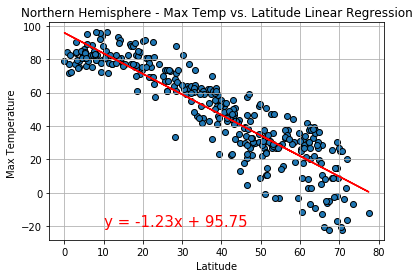

In [32]:
# Things we are going to plot 
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]

#code to find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the sactter plot and the linear regression
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#extra stuff to pretty up the graph
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

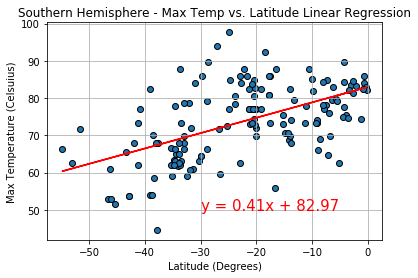

In [35]:
# Things we are going to plot 
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]

#code to find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the sactter plot and the linear regression
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

#extra stuff to pretty up the graph
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Max Temperature (Celsuius)")
plt.grid()
plt.show()

The linear regression for both the North and Southern hempiseres shows us that their is a corellation between Max temp and how the closer you get to the equator.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

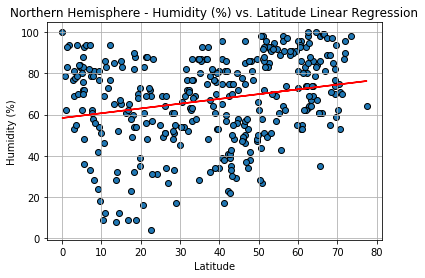

The linear Regression equation for the scatter plot is : y = 0.23x + 58.36


In [18]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print("The linear Regression equation for the scatter plot is : " +str(line_eq))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

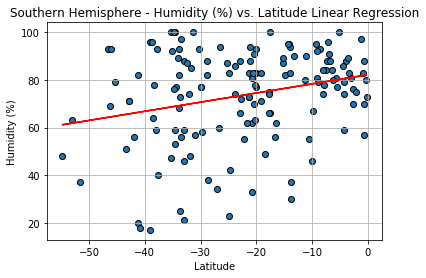

The linear Regression equation for the scatter plot is : y = 0.38x + 82.14


In [19]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print("The linear Regression equation for the scatter plot is : " +str(line_eq))

* The linear regression for both the North and Southern hempiseres shows us that their is a corellation between Humidity and how the closer you get to the equator.It tells us that there is more humidity closer to the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

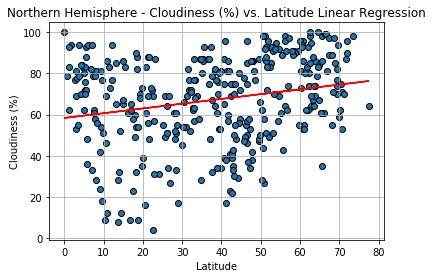

The linear Regression equation for the scatter plot is : y = 0.23x + 58.36


In [20]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
print("The linear Regression equation for the scatter plot is : " +str(line_eq))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

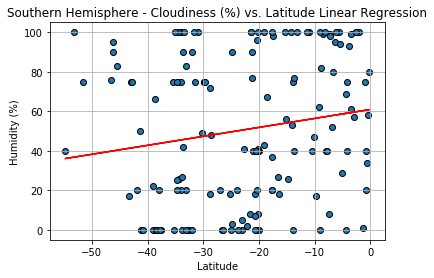

The linear Regression equation for the scatter plot is : y = 0.45x + 60.95


In [21]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print("The linear Regression equation for the scatter plot is : " +str(line_eq))



* There is no real correlation for either Northern or Southern Hemisphere and Cloudiness as both have a slight positive correlation which has no affect on the equator


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

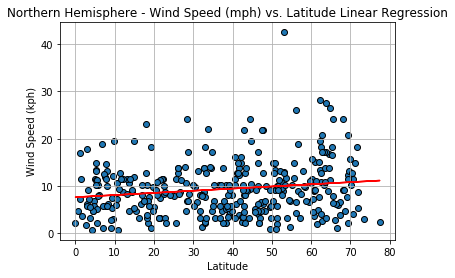

The linear Regression equation for the scatter plot is : y = 0.05x + 7.66


In [22]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid()
plt.show()
print("The linear Regression equation for the scatter plot is : " +str(line_eq))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

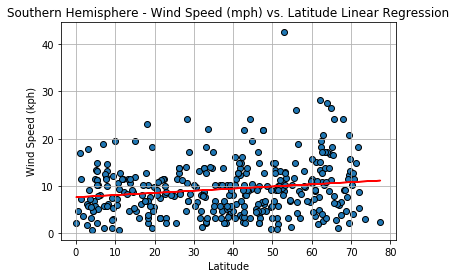

The linear Regression equation for the scatter plot is : y = 0.05x + 7.66


In [23]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid()
plt.show()
print("The linear Regression equation for the scatter plot is : " +str(line_eq))

* There is no correlation for either Northern or Southern Hemisphere and Wind Speed